## Подключаем Python

In [1]:
from xmlrpclib import ServerProxy
from IPython.display import Image

#### Скачиваем белок

In [2]:
cmd = ServerProxy(uri="http://localhost:9123/RPC2")
cmd.fetch('1lmp')
import time
cmd.hide("everything")

#### Выделяем лиганды

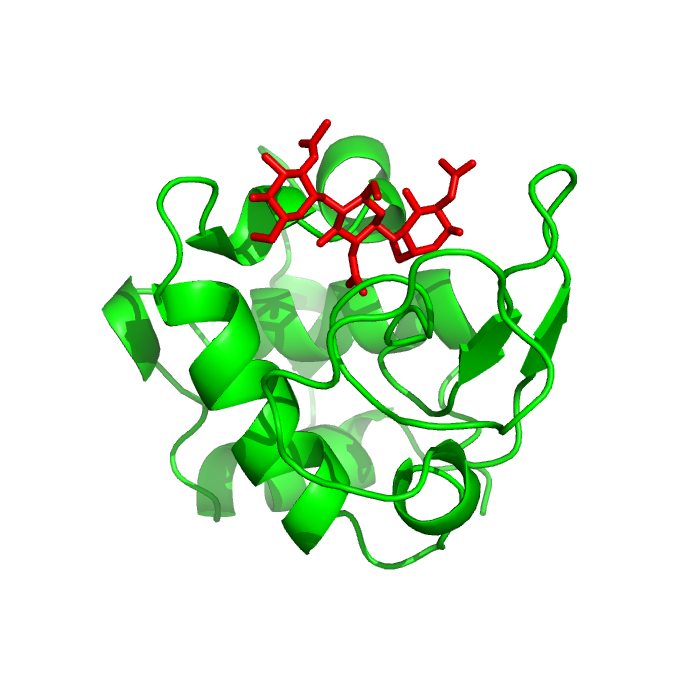

In [3]:
cmd.extract("water","resn HOH")
cmd.delete("water")
cmd.set("opaque_background", 'off')
cmd.bg_color('white')
cmd.show_as("cartoon")
cmd.select("leg","resn NDG+NAG") #узнаем это через последовательность
cmd.select("prot","not leg")
cmd.color("green", "prot")
cmd.show("sticks", "leg")
cmd.color("red", "leg")
cmd.center()
cmd.zoom()
cmd.ray(700,700)
cmd.png('1lmp_lgd.png')
time.sleep(2)
Image(filename='1lmp_lgd.png')

### Внесение мутации
#### Выделение остатков, находящихся в связи с лигандом

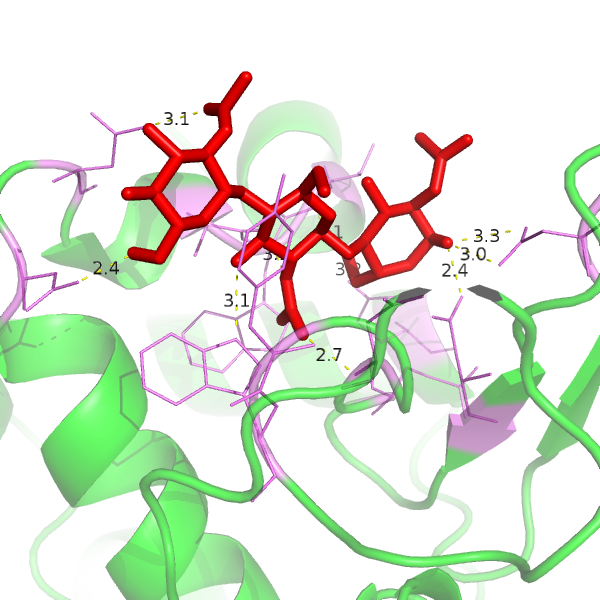

In [4]:
cmd.set('dash_width',"1")
cmd.set('cartoon_transparency','0.4')
cmd.select("near","byres prot within 3.5 of leg")
cmd.show("lines","near")
cmd.color('violet','near')
cmd.distance("hbond","near","leg","3.5","2")
cmd.center()
cmd.zoom("near")
cmd.ray(600,600)
cmd.png('near.png')
time.sleep(2)
Image(filename='near.png')

#### "Раскрашиваем" аспарат в синий, чтобы на нем смотреть, как работает мутация

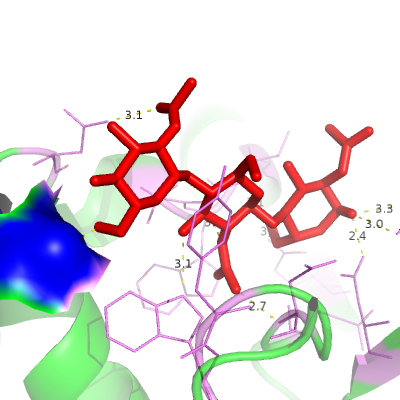

In [5]:
cmd.show('surface','resi 101')
cmd.show('sticks','resi 101')
cmd.show('surface','resi 101')
cmd.color('blue','resi 101')
cmd.center('resi 101')
cmd.zoom('(resi 101) + leg')
cmd.ray(400,400)
cmd.png('surf_resi.png')
time.sleep(2)
Image(filename='surf_resi.png')

#### Производим мутацию (валин вместо аспарата)

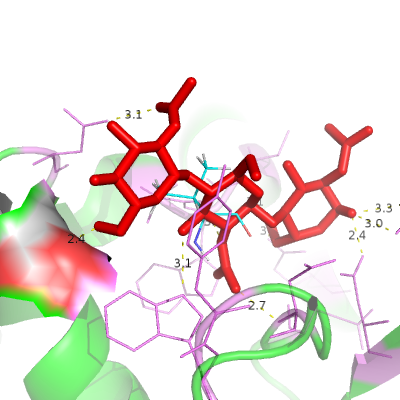

In [6]:
cmd.wizard("mutagenesis")
cmd.do('cmd.get_wizard().do_select("resi 101")')
cmd.do('cmd.get_wizard().set_mode("VAL")')
cmd.do('cmd.get_wizard().apply()')
cmd.do('cmd.set_wizard("done")')
cmd.save('1lmp_mut.pdb') 
cmd.select('mut','(resn NDG+NAG)+(resi 101)')
cmd.center('mut')
cmd.show('surface','resi 101')
cmd.zoom('mut')
cmd.ray(400,400)
cmd.png('mut.png')
time.sleep(2)
Image(filename='mut.png')

In [7]:
# movie
cmd.reinitialize()
cmd.do('''
load 1lmp.pdb
load 1lmp_mut.pdb

set matrix_mode, 1
set movie_panel, 1
set scene_buttons, 1
set cache_frames, 1

hide everything
show sticks, all
color limegreen, 1lmp
color lightblue, 1lmp_mut
color yelloworange, resn NAG+NDG
color white, /1lmp_mut//A/VAL`101
color blue, /1lmp//A/ASP`101
set movie_auto_interpolate, off

select mut, resi 101

translate [150,0,0]
rotate y, 15, object=1lmp_mut

orient 1lmp or 1lmp_mut

mset 1 x200
frame 1
mview store
mview store, object=1lmp_mut
mview store, object=1lmp

frame 30
orient 1lmp_mut
mview store
mview store, object=1lmp_mut
mview store, object=1lmp

frame 60
orient 1lmp
mview store
mview store, object=1lmp_mut
mview store, object=1lmp

frame 90
python
cmd.madd("1 x3"); cmd.frame(300);
cmd.rotate("y", -15.5, object="1lmp_mut")
cmd.mview("store", object="1lmp_mut")
cmd.mview("store")
cmd.mview("interpolate", object="1lmp_mut")
cmd.mview("reinterpolate")
python end

super 1lmp, 1lmp_mut
 
orient mut
mview store

madd 1 x30

mview interpolate, object=1lmp_mut
mview interpolate, object=1lmp
mview reinterpolate
 
mplay
''')

In [9]:
%%html
<img src="https://sun9-9.userapi.com/c816332/u4850481/docs/77c23e12b063/moviegif.gif?extra=z8Td6vecf86gC2ghaNgYkJloHq_btHcyChwNMfrrvGcglVzkLjshgNilFvh9SOU6Rd6151GCNt4ApEnUZRALt1xOPrL3OECTNPaR2yiiV_rIbesevbI">

### Tamra

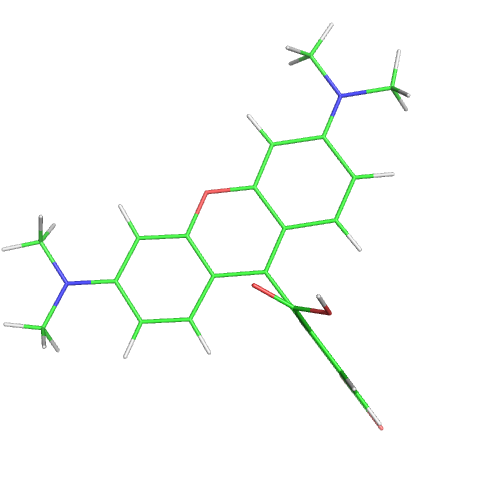

In [26]:
cmd.reinitialize()
from xmlrpclib import ServerProxy
from IPython.display import Image
cmd = ServerProxy(uri="http://localhost:9123/RPC2")
cmd.delete("all")
cmd.load('tamra.sdf')
import time
cmd.select('tamra, tamra')
cmd.bg_color('white')
cmd.ray(500,500)
cmd.png('tamra.png')
time.sleep(2)
Image(filename='tamra.png')


#### 1lmp

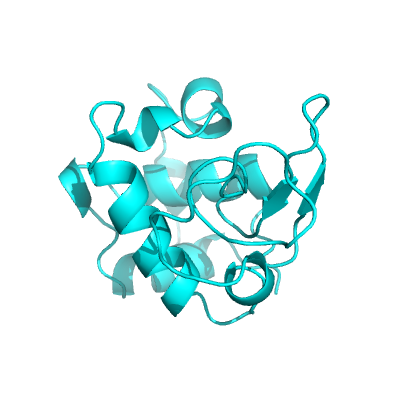

In [27]:
cmd.fetch("1lmp")
cmd.extract("water","resn HOH")
cmd.delete("water")
cmd.set("opaque_background", 'off')
cmd.bg_color('white')
cmd.show_as("cartoon")
cmd.center('1lmp')
cmd.zoom('1lmp')
cmd.ray(400,400)
cmd.png('1lmp_2.png')
time.sleep(2)
Image(filename='1lmp_2.png')

#### В серине есть OH, так что берем 32 серин

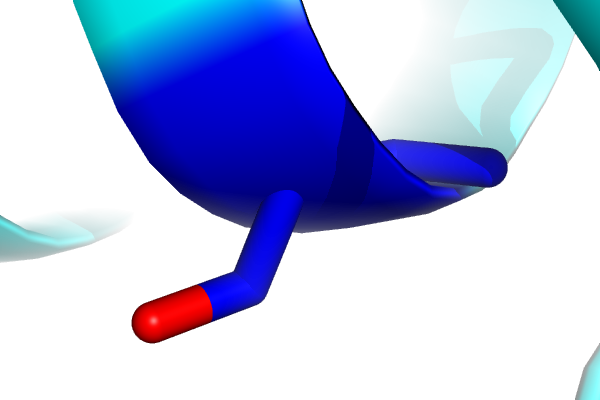

In [28]:
cmd.select('ser','/1lmp//A/SER`32')
cmd.show('sticks','ser')
cmd.color('blue','ser')
cmd.center('ser')
cmd.zoom('ser')
cmd.select('ao','/1lmp//A/SER`32/OG')
cmd.color('red','ao')
cmd.ray(600,400)
cmd.png('ser32.png')
time.sleep(2)
Image(filename='ser32.png')

In [29]:
cmd.center('tamra')
cmd.show('lines','tamra')
cmd.zoom('tamra')

In [30]:
#cmd.select('co','/tamra///UNK`/C')
cmd.fuse('ao','co') #co выбрали руками, торсионный угол 146,2